<a href="https://colab.research.google.com/github/Sravani-05/DL-Assignment1/blob/main/BlackboxDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
from fastai.vision.all import *
from fastai.text.all import *
from fastai.tabular.all import *
from fastai.collab import *

**Image classification using cnn_learner**

In [ ]:
# Download data folder
path = untar_data(URLs.CIFAR)
path.ls()

(#3) [Path('/root/.fastai/data/cifar10/labels.txt'),Path('/root/.fastai/data/cifar10/train'),Path('/root/.fastai/data/cifar10/test')]

In [ ]:
# Download training data
dataset_path = untar_data(URLs.CIFAR)/'train'
dataset_path.ls()

(#10) [Path('/root/.fastai/data/cifar10/train/horse'),Path('/root/.fastai/data/cifar10/train/cat'),Path('/root/.fastai/data/cifar10/train/automobile'),Path('/root/.fastai/data/cifar10/train/ship'),Path('/root/.fastai/data/cifar10/train/dog'),Path('/root/.fastai/data/cifar10/train/deer'),Path('/root/.fastai/data/cifar10/train/airplane'),Path('/root/.fastai/data/cifar10/train/bird'),Path('/root/.fastai/data/cifar10/train/frog'),Path('/root/.fastai/data/cifar10/train/truck')]

In [ ]:
# Extract label from image filename
def labels(x):
    return x.split('_')[1][:-4]

In [ ]:
# ImageDataLoaders tells fastai the kind and structure of the dataset
classification_data = ImageDataLoaders.from_name_func(dataset_path, get_image_files(dataset_path), seed=42, valid_pct=0.2, label_func=labels, item_tmfs=Resize(224))

In [ ]:
# CNN using resnet architecture and evaluation of model performance on validation set using error_rate
model = vision_learner(classification_data, resnet34, metrics=error_rate)

# fine tune model with 1 epoch
model.fine_tune(1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.749127,1.519369,0.527800,08:06


epoch,train_loss,valid_loss,error_rate,time
0,0.912457,0.822674,0.291200,16:51


Image Segmentation using unet_learner

In [ ]:
# Download data folder
dataset_path = untar_data(URLs.CAMVID_TINY)
dataset_path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/labels')]

In [ ]:
segmentation_data = SegmentationDataLoaders.from_label_func(dataset_path, bs=8, fnames = get_image_files(dataset_path/'images'), 
                                                            label_func = lambda o: dataset_path/'labels'/f'{o.stem}_P{o.suffix}', codes = np.loadtxt(dataset_path/'codes.txt', dtype=str))

In [ ]:
# Unet using Resnet34 architecture
model = unet_learner(segmentation_data, resnet34)

# Fine tune model with 1 epoch
model.fine_tune(10)

epoch,train_loss,valid_loss,time
0,4.529859,2.856773,01:06


epoch,train_loss,valid_loss,time
0,1.782706,1.480489,01:14
1,1.540510,1.342411,01:14
2,1.370307,1.046721,01:13
3,1.237475,1.042015,01:11
4,1.128655,0.873698,01:11
5,1.023539,0.827892,01:12
6,0.931818,0.754048,01:11
7,0.853115,0.744232,01:11
8,0.787762,0.720699,01:12
9,0.736760,0.722880,01:13


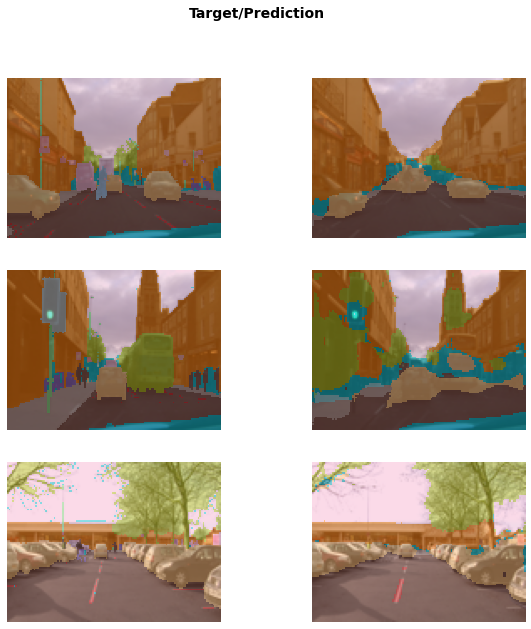

In [ ]:
# Segmentation results
model.show_results(max_n=3, figsize=(10,10))

**Sentiment Analysis using text_classifier_learner**

In [ ]:
# Download data folder
path = untar_data(URLs.YELP_REVIEWS_POLARITY)
path.ls()

(#3) [Path('/root/.fastai/data/yelp_review_polarity_csv/train.csv'),Path('/root/.fastai/data/yelp_review_polarity_csv/readme.txt'),Path('/root/.fastai/data/yelp_review_polarity_csv/test.csv')]

In [ ]:
# Use TextDataLoaders to load data
text_data = TextDataLoaders.from_csv(path=path, csv_fname='train.csv', valid_pct=0.2, seed=42)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Using AWD_LSTM architecture for sentiment analysis 
model = text_classifier_learner(text_data, AWD_LSTM, drop_mult=0.2, metrics=accuracy)

In [ ]:
  # Fine tune model in 1 epoch
model.fine_tune(1)

**Tabular data using tabular_learner**

In [17]:
# Download tabular data
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

(#3) [Path('/root/.fastai/data/adult_sample/adult.csv'),Path('/root/.fastai/data/adult_sample/models'),Path('/root/.fastai/data/adult_sample/export.pkl')]

In [18]:
# Load tabular data
tabular_data = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names='salary', cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'], procs = [Categorify, FillMissing, Normalize])

# Fit learner
model = tabular_learner(tabular_data, metrics=accuracy)

In [19]:
model.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.382001,0.362562,0.829545,00:04
1,0.351544,0.351643,0.836609,00:04


**Ranking using colab_learner**

In [20]:
# Download dataset
path = untar_data(URLs.ML_SAMPLE)

In [21]:
# Load ratings data using CollabDataLoaders
ranking_data = CollabDataLoaders.from_csv(path/'ratings.csv')

In [22]:
# Learn model and fine_tune with 10 epochs
model = collab_learner(ranking_data, y_range=(0, 5))
model.fine_tune(10)

epoch,train_loss,valid_loss,time
0,2.501752,2.289891,00:00


epoch,train_loss,valid_loss,time
0,2.226123,2.161507,00:00
1,2.006977,1.759392,00:00
2,1.498340,1.098256,00:00
3,1.006092,0.790418,00:00
4,0.773746,0.710030,00:00
5,0.697849,0.683693,00:00
6,0.657641,0.675843,00:00
7,0.639127,0.671773,00:00
8,0.638605,0.670248,00:00
9,0.630952,0.670111,00:00


In [23]:
# Predicted ratings
model.show_results()

,userId,movieId,rating,rating_pred
0,74.0,27.0,4.0,3.706684
1,70.0,70.0,5.0,3.995987
2,49.0,75.0,5.0,4.217104
3,47.0,88.0,4.0,4.428773
4,27.0,28.0,2.5,3.156275
5,54.0,47.0,2.5,4.284218
6,6.0,80.0,3.5,4.050022
7,51.0,2.0,3.5,3.338864
8,87.0,69.0,5.0,4.198102
